<a href="https://colab.research.google.com/github/rodrigobsouza17/Analise_de_Dados/blob/MVP/MVP_An%C3%A1lise_de_dados_2025_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUC-Rio: Pós-Graduação em Ciência de Dados e Analytics
# Autor: Rodrigo Batista de Souza
# Matrícula: 4052024001439
# Disciplina: Análise de Dados e Boas Práticas


# MVP: Análise de Dados das Funções dos Jogadores da NBA - Temporada 2022-2023

## Sumário:
1. Introdução
2. Descrição do problema
3. Carga e Exploração dos Dados
4. Análise Exploratória de Dados
  * Estatísticas Descritivas
  * Visualizações
5. Pré-processamento de Dados
6. Conclusão Final

### 1. Introdução:

A NBA é uma das ligas esportivas mais acompanhadas e competitivas existentes hoje em dia, atraindo milhões de fãs e admiradores mundo afora. Mediante a sua expressiva audiência, cada vez mais crescente, a possibilidade de criação de inúmeras análises são infinitas, em especial a estatística das funções dos jogadores, uma vez que ela pode revelar padrões interessantes sobre desempenho e eficiência.
A motivação deste trabalho, portanto, foi tentar explorar os dados extraídos de uma temporada, em particular o período de 2022-2023 (tínhamos mais dados disponíveis), identificando tendências e correlações entre diferentes atributos dos jogadores. Com isso, tentamos buscar algumas respostas para perguntas do tipo:
* Existe uma relação entre minutos jogados e pontos por jogo?
* Quais fatores influenciam o número de assistências e rebotes?
* Jogadores de determinadas posições têm maior eficiência em arremessos?

Para tanto, foi considerado para o desenvolvimento deste projeto o arquivo (dataset) base retirado do site do Kaggle (https://www.kaggle.com/datasets/prxshetty/nba-player-stats-2022-2023) que, por sua vez, foi armezenado no repositório do Github (https://github.com/rodrigobsouza17/Analise_de_Dados) para fins de apresentação e direcionamento das informações pertinentes ao projeto. Para os amantes do esporte, acreditamos que as análises são bem-vindas para aprimorar e inovar os entendimentos sobre o jogo.

### 2. Descrição do Problema

Com base nas estatísticas dos jogadores, queremos explorar o dataset para obter insights sobre:
* As distribuições das principais estatísticas do jogo (pontos, rebotes, assistências, etc)
* A relação entre diferentes estatísticas do jogo
* A identificação de possíveis outliers ou, então, jogadores com desempenhos notáveis
* A preparação dos dados para que possam ser utilizados em futuras desenvolvimentos de aprendizado de máquina (Machine Learning, termo que utilizaremos daqui por diante), como, por exemplo, problemas de classificação ou agrupamento.

#### a ) Premissas e Hipóteses:

* Os dados são representativos do desempenho dos jogadores na temporada 2022-2023
* Estatísticas como pontos, rebotes e assistências são métricas chave para avaliar o desempenho de um jogador
* Existem relações entre o tempo de jogo de um atleta e suas estatísticas
* Jogadores de diferentes posições podem apresentar padrões estatísticos distintos

#### b ) Restrições ou condições para a seleção dos dados:
* O dataset contém estatísticas agregadas por jogador e não por jogo
* A escolha do Kaggle foi por este site ser bastante confiável e disponibilizar uma vasta quantidade de bases esportivas ideais para se montar estatísticas.

### 3. Carga e Exploração dos Dados:

In [1]:
# Importação das bibliotecas essenciais:
import warnings
warnings.filterwarnings('ignore') # para ignorar os avisos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Configurações para melhor visualização dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Carga dos Dados:
url = 'https://raw.githubusercontent.com/rodrigobsouza17/Analise_de_Dados/main/mvp/nba_2022_2023_stats.csv'
df = pd.read_csv(url)

# Visualização das primeiras linhas do dataset:
print ('\nPrimeiras 5 linhas do dataset:')
print(df.head())


Primeiras 5 linhas do dataset:
   Rk            Player   Pos  Age   Tm   G  GS    MP   FG   FGA  ...  ORB  \
0   1  Precious Achiuwa  PF-C   24  TOT  53  14  22.5  3.3   6.8  ...  2.7   
1   1  Precious Achiuwa     C   24  TOR  25   0  17.5  3.1   6.8  ...  2.0   
2   1  Precious Achiuwa    PF   24  NYK  28  14  26.9  3.5   6.8  ...  3.3   
3   2       Bam Adebayo     C   26  MIA  49  49  34.6  7.7  15.1  ...  2.2   
4   3      Ochai Agbaji    SG   23  TOT  59  10  18.9  2.1   4.8  ...  0.7   

   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  Player-additional  
0  3.9   6.6  1.4  0.6  0.8  1.1  1.9   8.0          achiupr01  
1  3.4   5.4  1.8  0.6  0.5  1.2  1.6   7.7          achiupr01  
2  4.3   7.6  1.0  0.6  1.1  1.0  2.2   8.3          achiupr01  
3  8.3  10.5  4.1  1.1  1.0  2.5  2.5  20.3          adebaba01  
4  1.7   2.3  0.9  0.5  0.5  0.7  1.3   5.4          agbajoc01  

[5 rows x 31 columns]


In [2]:
# Principais atributos do dataset:
print ('\nAtributos do dataset:')
print(df.columns)

# Informações do dataset:
print("\nInformações sobre os atributos (colunas):")
df.info()


Atributos do dataset:
Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Player-additional'],
      dtype='object')

Informações sobre os atributos (colunas):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 679 non-null    int64  
 1   Player             679 non-null    object 
 2   Pos                679 non-null    object 
 3   Age                679 non-null    int64  
 4   Tm                 679 non-null    object 
 5   G                  679 non-null    int64  
 6   GS                 679 non-null    int64  
 7   MP                 679 non-null    float64
 8   FG                 679 non-null    float64
 9   FGA                67

A listagem dos atributos do dataset é útil para nós entendermos quais informações estão disponíveis para se trabalhar. Isso nos ajuda a definir quais variáveis serão analisadas.
Com base na inspeção inicial e no conhecimento prévio sobre estatísticas de basquete, podemos descrever os atributos da seguinte forma:

* **Rk**: Rank (classificação do jogador na lista).
* **Player**: Nome do jogador.
* **Pos**: Posição do jogador (por ex: PG - Point Guard, SG - Shooting Guard, SF - Small Forward, PF - Power Forward, C - Center).
* **Age**: Idade do jogador.
* **Tm**: Time atual do jogador. (OBS: Pode haver 'TOT' indicando total de estatísticas para jogadores que porventura trocaram de time na temporada.
* **G**: Jogos disputados).
* **GS**: Jogos como titular (Games Started).
* **MP**: Minutos por jogo (Minutes Per Game).
* **FG**: Arremessos de quadra convertidos (Field Goals).
* **FGA**: Tentativas de arremessos de quadra (Field Goal Attempts).
* **FG%**: Porcentagem de arremessos de quadra convertidos (Field Goal Percentage).
* **3P**: Arremessos de 3 pontos convertidos (3-Point Field Goals).
* **3PA**: Tentativas de arremessos de 3 pontos (3-Point Field Goal Attempts).
* **3P%**: Porcentagem de arremessos de 3 pontos convertidos (3-Point Field Goal Percentage).
* **2P**: Arremessos de 2 pontos convertidos (2-Point Field Goals).
* **2PA**: Tentativas de arremessos de 2 pontos (2-Point Field Goal Attempts).
* **2P%**: Porcentagem de arremessos de 2 pontos convertidos (2-Point Field Goal Percentage).
* **eFG%**: Porcentagem efetiva de arremessos de quadra (Effective Field Goal Percentage), que ajusta para o valor dos arremessos de 3 pontos.
* **FT**: Lances livres convertidos (Free Throws).
* **FTA**: Tentativas de lances livres (Free Throw Attempts).
* **FT%**: Porcentagem de lances livres convertidos (Free Throw Percentage).
* **ORB**: Rebotes ofensivos (Offensive Rebounds).
* **DRB**: Rebotes defensivos (Defensive Rebounds).
* **TRB**: Total de rebotes (Total Rebounds).
* **AST**: Assistências (Assists).
* **STL**: Roubos de bola (Steals).
* **BLK**: Tocos (Blocks).
* **TOV**: Turnovers (perdas de posse de bola).
* **PF**: Faltas pessoais (Personal Fouls).
* **PTS**: Pontos (Points).

### 4. Análise Exploratória dos Dados:

A etapa de análise exploratória dos dados é de suma importância para que possamos compreender a informação disponível no dataset, identificando características, distribuições, relações e possíveis problemas como, por exemplo, valores faltantes ou inconsistentes. Para a execução desta parte, portanto, utilizaremos técnicas de estatística que nos ajudam a ter poder de interpretação das ideias envolvidas.

#### a) Estatísticas Descritivas:

In [3]:
# Quantidade de atributos (colunas) e instâncias (linhas):
num_instancias, num_atributos = df.shape
print(f"\nO dataset possui {num_instancias} instâncias (jogadores) e {num_atributos} atributos (estatísticas).\n")


O dataset possui 679 instâncias (jogadores) e 31 atributos (estatísticas).



In [4]:
# Contagem de valores faltantes por coluna
missing_values = df.isnull().sum()
print("\nValores faltantes por coluna:")
print(missing_values[missing_values > 0].sort_values(ascending=False))

# Porcentagem de valores faltantes
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPorcentagem de valores faltantes por coluna:")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


Valores faltantes por coluna:
FT%     68
3P%     62
2P%     23
FG%     14
eFG%    14
dtype: int64

Porcentagem de valores faltantes por coluna:
FT%     10.014728
3P%      9.131075
2P%      3.387334
FG%      2.061856
eFG%     2.061856
dtype: float64


Esta passagem de código, particularmente, é interessante para verificarmos atributos que possuem valores nulos (ou preenchidos como NaN) que, posteriormente, podem ser trabalhados para melhorarmos a qualidade das análises envolvidas.
No nosso projeto, podemos desconfiar sobre o que está acontecendo pelos seguintes aspectos:
* As colunas de porcentagem (`3P%`, `FT%`, `2P%`, `eFG%`, `FG%`) são as que apresentaram valores faltantes. Isso ocorre porque a porcentagem é calculada como (arremessos convertidos / tentativas de arremesso). Se um jogador não tentou nenhum arremesso (o denominador é zero), a porcentagem é indefinida (NaN).
* `FT%' ; '3P%` têm a maior quantidade de NaN's, indicando que muitos jogadores ou não tentaram ou não converteram arremessos de lances livres ou de 3 pontos.
* Esses NaN's não são necessariamente 'erros', mas sim representam a ausência de tentativas. Poderemos tratá-los substituindo por 0 (se a interpretação for '0% de acerto em 0 tentativas') ou pela média/mediana, ou até removendo as linhas se a porcentagem for crítica para a análise e houver muitos NaN's. Para porcentagens, preencher com 0 é geralmente mais sensato, pois implica que o jogador teve 0% de aproveitamento em 0 tentativas.

In [5]:
# Resumo estatístico dos dados numéricos:
print("\nResumo estatístico dos atributos numéricos:")
summary_stats = df.describe().T # Transposição de colunas para facilitar a leitura

# Adicionar a moda e a contagem de valores ausentes
moda = df.mode(numeric_only=True).iloc[0] # Pega a primeira moda se houver múltiplas
valores_ausentes = df.isnull().sum()

# Combinar as informações
summary_stats['mode'] = moda
summary_stats['missing_values'] = valores_ausentes

display(summary_stats)


Resumo estatístico dos atributos numéricos:


,count,mean,std,min,25%,50%,75%,max,mode,missing_values
Rk,679.0,270.547865,160.892359,1.0,132.50000,276.000,408.50000,548.0,143.0,0
Age,679.0,26.159057,4.374238,19.0,23.00000,25.000,29.00000,39.0,24.0,0
G,679.0,31.932253,19.662975,1.0,13.00000,35.000,50.00000,61.0,58.0,0
GS,679.0,14.412371,19.574927,0.0,0.00000,3.000,26.00000,61.0,0.0,0
MP,679.0,18.053756,10.107631,0.5,9.50000,17.200,26.85000,37.8,3.0,0
FG,679.0,2.963770,2.443246,0.0,1.10000,2.200,4.35000,11.8,0.0,0
FGA,679.0,6.395287,4.954201,0.0,2.60000,4.900,9.10000,23.6,1.0,0
FG%,665.0,0.446723,0.125746,0.0,0.39800,0.448,0.50000,1.0,0.5,14
3P,679.0,0.914138,0.881324,0.0,0.20000,0.700,1.40000,5.0,0.0,0
3PA,679.0,2.565832,2.230391,0.0,0.70000,2.000,3.80000,12.2,0.0,0


Podemos deduzir os seguintes aspectos após esta inferência:
* **`count`**: Confirma o número de valores não-nulos para cada coluna. Notamos novamente que as colunas de porcentagem (`FG%`, `3P%`, etc.) têm contagens menores, o que caracteriza a presença dos NaN's.
* **`mean` (média) e `50%` (mediana)**: Para muitas colunas (por ex:, `Age`, `G`, `MP`, `PTS`, `AST`, `TRB`), a média e a mediana são razoavelmente próximas, sugerindo distribuições simétricas ou levemente assimétricas. Para outras, como `GS`, a média é significativamente maior que a mediana, indicando uma distribuição com calda à direita (muitos jogadores com poucos, e alguns com muitos). Isso é esperado e comum no esporte, pois apenas alguns jogadores são especialistas ou têm grande volume nessas categorias.
* **`std` (desvio-padrão)**: Indica a dispersão dos dados. Colunas como `G`, `MP`, `GS` mostram desvios-padrão altos em relação à média, o que é esperado, pois o desempenho entre jogadores varia muito.
* **`min` (mínimo)**: Para muitas estatísticas de jogo (por ex:, `FG`, `PTS`, `AST`, `TRB`), o valor mínimo é 0. Isso é perfeitamente plausível, pois alguns jogadores podem ter tido participação muito limitada ou nula em certas categorias. Para `Age`, o mínimo de 19 anos é normal para jogadores da NBA, uma vez que os calouros geralmente começam nessa faixa etária.
* **`max` (máximo)**: O valor máximo para `PTS` (35.3 pontos), `AST` (11.4 assistências) e `TRB` (13.2 rebotes) representa os jogadores de elite em cada categoria. Isso sugere que os dados contêm a gama completa de desempenhos.
* **`mode` (moda)**: A moda para `Age` (24 anos) indica que a idade mais comum entre os jogadores é 24. Para `G` (Jogos), a moda de 58 indica que a maioria dos jogadores jogou um número substancial de jogos (A temporada regular dura 82 jogos. O número pode aumentar se o time for classificado para os playoffs ou então finais de copas). Para outras estatísticas, a moda frequentemente é 0, confirmando que muitos jogadores têm contribuições mínimas em certas categorias.
* **`missing_values`**: Reafirma a presença de NaN's, especialmente nas colunas de porcentagem.

Em geral, os dados parecem consistentes com o que se espera de estatísticas de basquete, com variações significativas entre jogadores, que é o que torna a análise interessante.

#### b) Visualizações gráficas:

1 ) Histogramas para visualizações das distribuições:

A seguir, plotaremos vários histogramas para visualizarmos as distruibuições existentes nas colunas numéricas e discutirmos sobre os resultados.

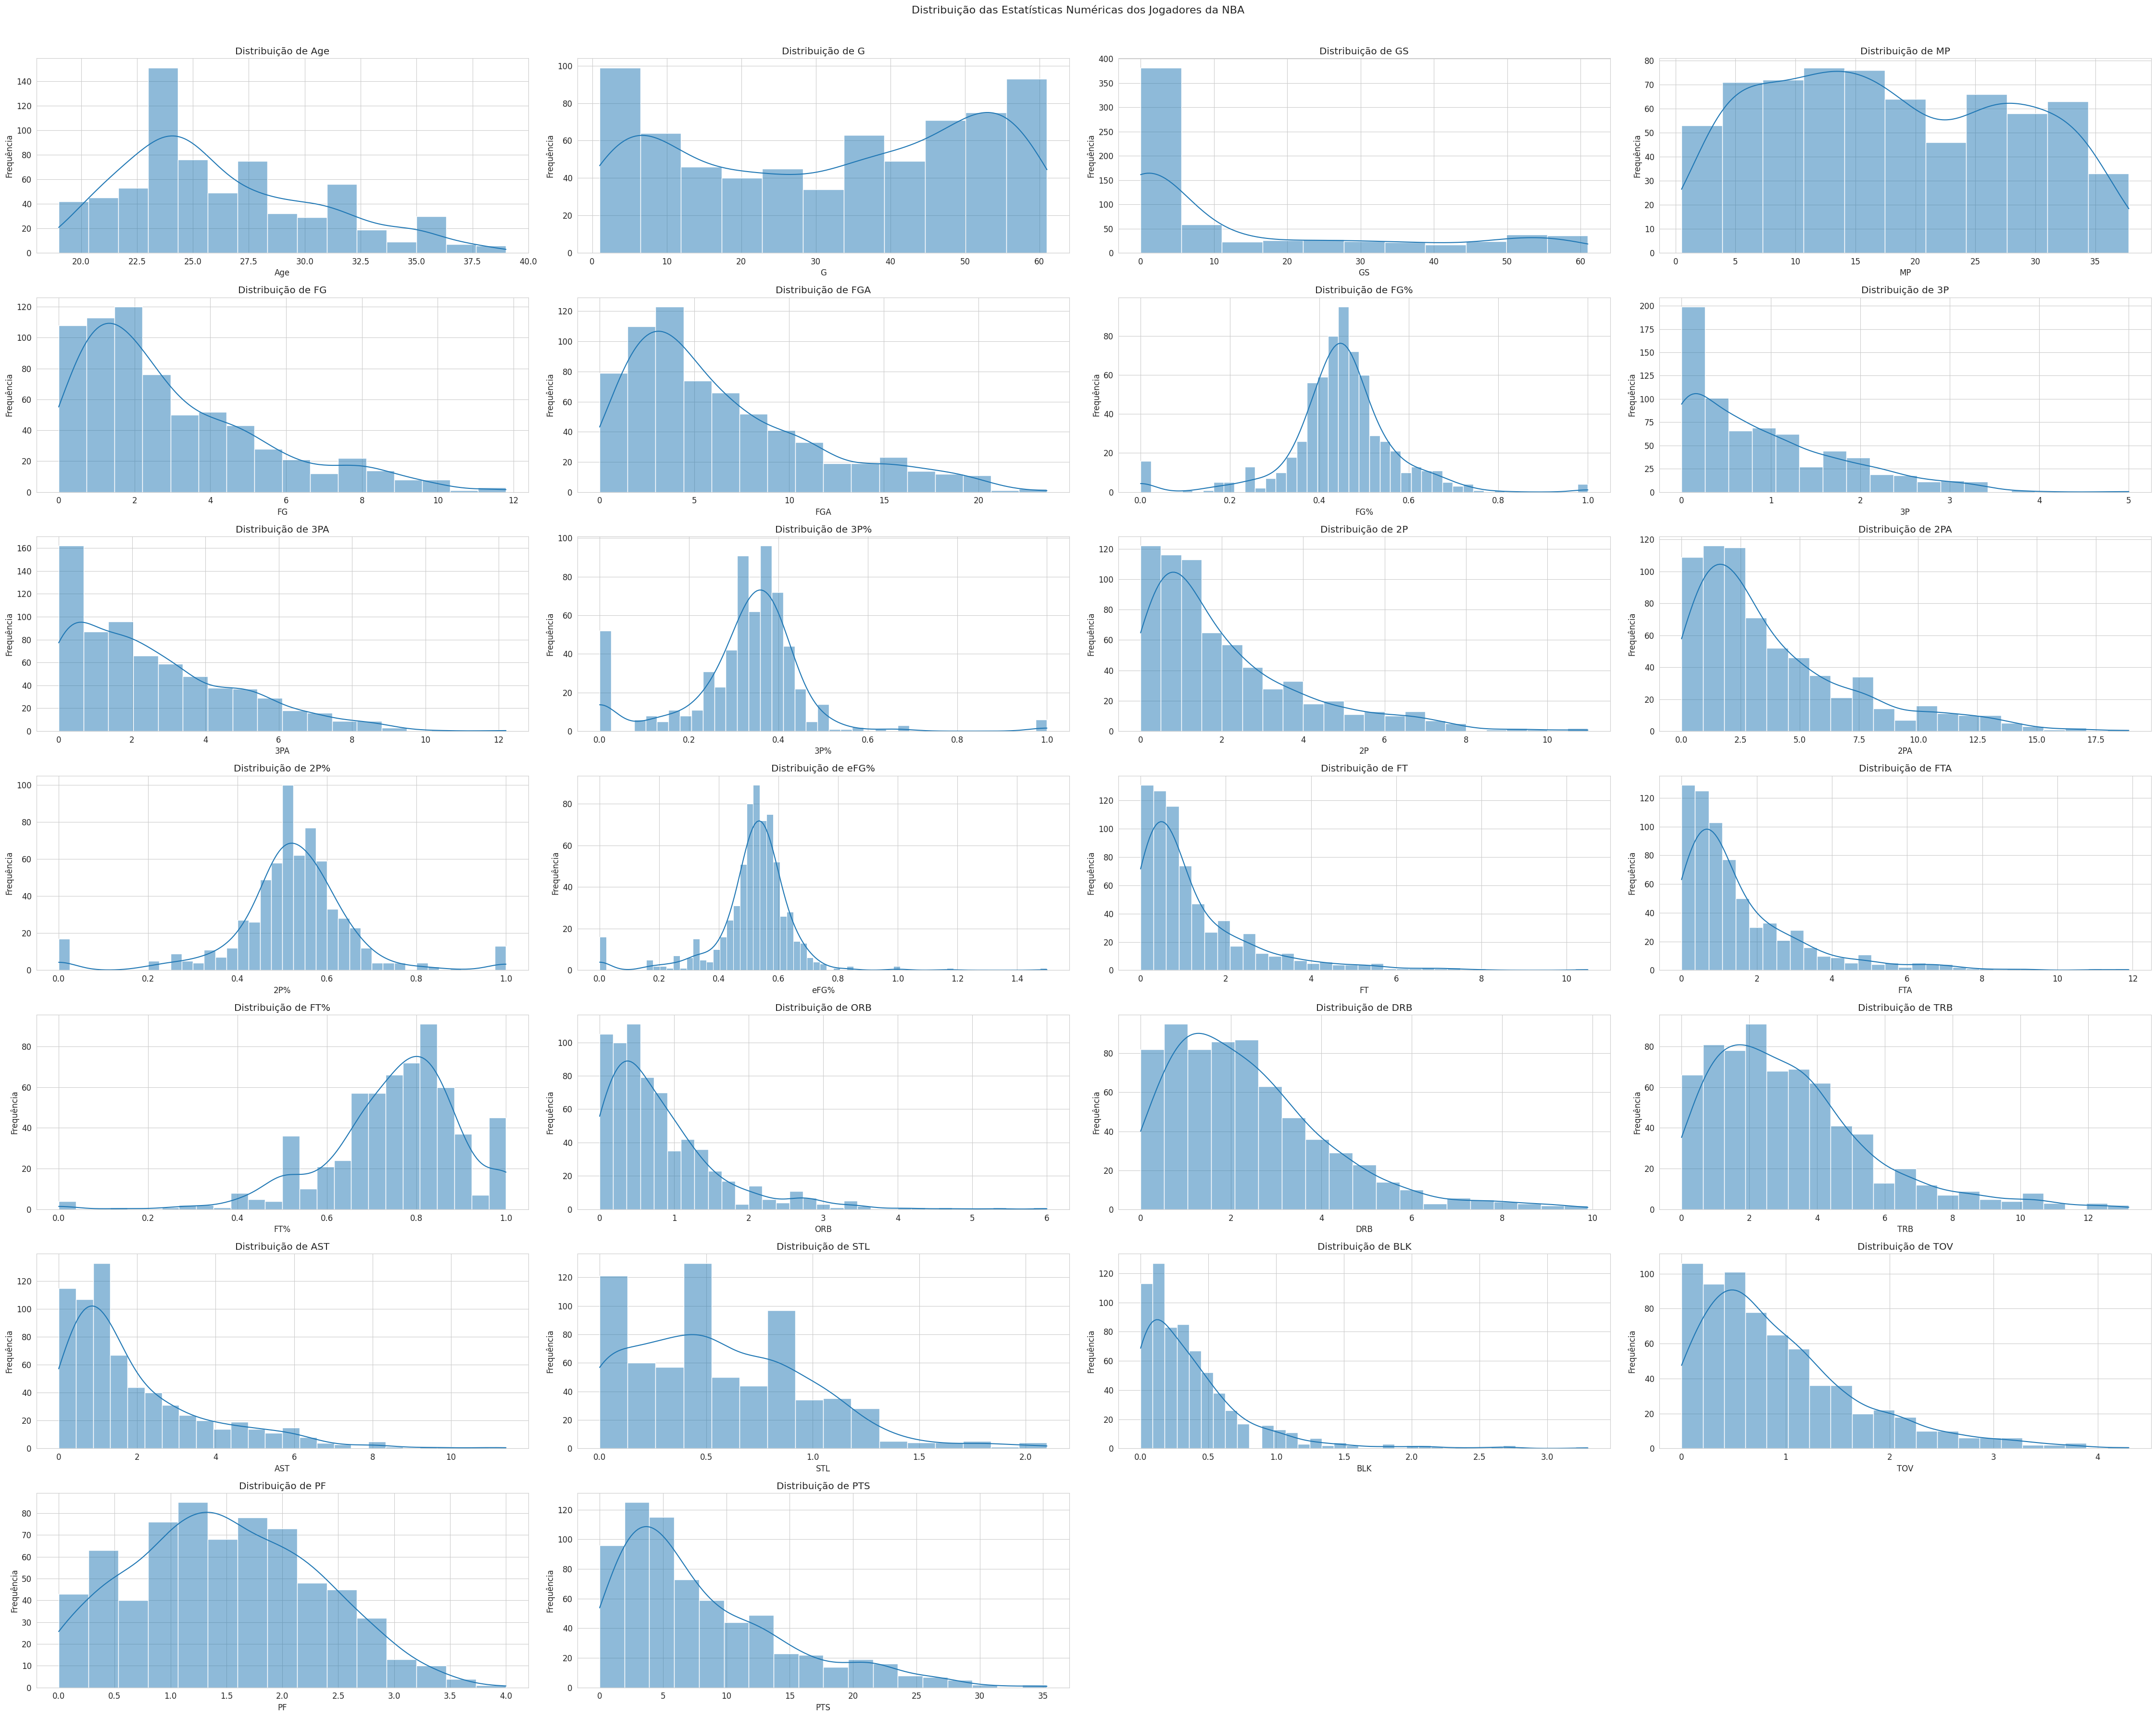

In [6]:
# Selecionar apenas as colunas numéricas para visualização
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Excluir 'Rk' (rank) pois é apenas um índice e não uma estatística de desempenho
if 'Rk' in numeric_cols:
    numeric_cols.remove('Rk')

# Plotar histogramas para cada coluna numérica
fig, axes = plt.subplots(nrows=len(numeric_cols)//4 + 1, ncols=4, figsize=(45, 5 * (len(numeric_cols)//4 + 1)))
axes = axes.flatten() # Achatar o array de subplots para iterar mais fácil

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i]) # .dropna() para lidar com NaN's
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# Remover subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distribuição das Estatísticas Numéricas dos Jogadores da NBA', y=1.02, fontsize=16)
plt.show() # OBS: Ao clicar na imagem, os gráficos ampliam-se

Podemos inferir as seguintes características para algumas destas distribuições:

1. **Pontos por jogo (PTS):**

    * Distribuição: Assimétrica à direita

    * Justificativa: A maioria dos jogadores marca poucos pontos, enquanto alguns poucos jogadores (geralmente os jogadores top, chamados de All-Stars, como Giannis Antetokounmpo, Luka Dončić e Stephen Curry) marcam muitos pontos, puxando a média para cima.

2. **Arremessos de 3 pontos convertidos (3P):**

    * Distribuição: Assimétrica à direita.

    * Justificativa: Muitos jogadores acertam poucos arremessos de 3 pontos por jogo, enquanto alguns especialistas (como Stephen Curry e Buddy Hield) acertam muitos, criando uma cauda longa à direita.

3. **Porcentagem de arremessos de campo (FG%):**

    * Distribuição: Normal ou muito próxima disso.

    * Justificativa: A eficiência de arremesso tende a se concentrar em torno de um valor médio (por exemplo, 45-50%), com poucos extremos muito altos ou muito baixos.

4. **Total de Rebotes por jogo (TRB):**

    * Distribuição: Assimétrica à direita.

    * Justificativa: A maioria dos jogadores pega poucos rebotes, enquanto pivôs dominantes (como Nikola Jokić e Rudy Gobert) têm números muito altos.

5. **Assistências por jogo (AST):**

    * Distribuição: Assimétrica à direita.

    * Justificativa: A maioria dos jogadores tem poucas assistências, enquanto armadores principais (como Tyrese Haliburton e James Harden) distribuem muitas assistências.

6. **Tocos por jogo (BLK):**

    * Distribuição: Extremamente assimétrica à direita.

    * Justificativa: A maioria dos jogadores tem poucos ou nenhum toco por jogo, enquanto alguns pivôs (como Jaren Jackson Jr. e Brook Lopez) têm números significativamente altos (são especialistas neste quesito).

7. **Roubos de bola por jogo (STL):**

    * Distribuição: Assimétrica à direita.

    * Justificativa: A maioria dos jogadores tem poucos roubos, enquanto alguns especialistas em defesa (como Alex Caruso) se destacam.

8. **Minutos por jogo (MP):**

    * Distribuição: Bimodal ou muito perto disso

    * Justificativa: Pode haver dois picos: um para jogadores que jogam poucos minutos (reservas) e outro para os titulares que jogam muitos minutos.

A assimetria à direita em muitas colunas numéricas pode sugerir, por exemplo, que a aplicação de transformações do tipo operação de logaritmo ou raiz quadrada pode ser benéfica para tornar as distribuições mais simétricas, o que é muitas vezes preferível para alguns modelos de Machine Learning, dependendo, claro, da proposta a ser feita. A presença de NaN's nas colunas de porcentagem reforça a necessidade de tratamento cuidadoso na etapa de pré-processamento.

2) Distribuição de frequência das posições:

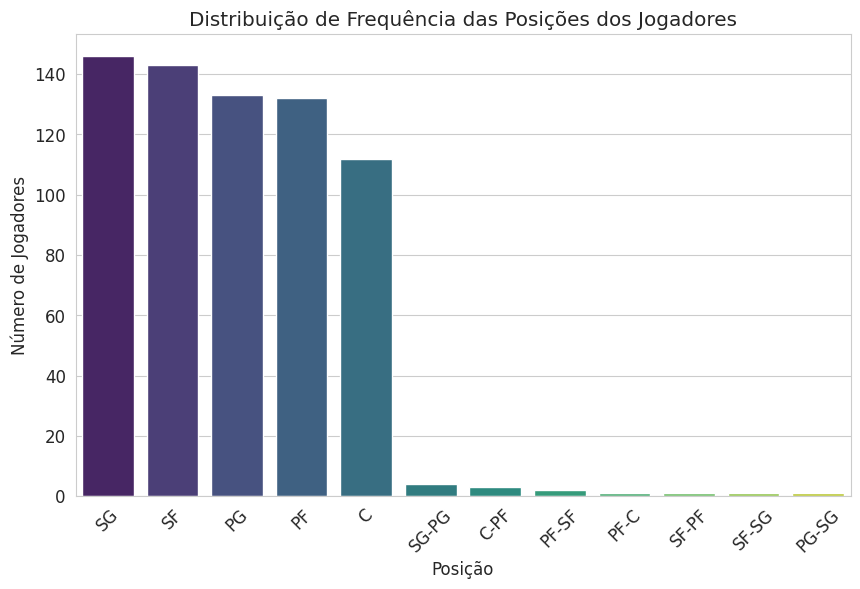

In [7]:
# Distribuição de frequência das posições:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pos', order=df['Pos'].value_counts().index, palette='viridis')
plt.title('Distribuição de Frequência das Posições dos Jogadores')
plt.xlabel('Posição')
plt.ylabel('Número de Jogadores')
plt.xticks(rotation=45)
plt.show()

**Análise da Distribuição das Posições:**

* A coluna `Pos` mostra uma distribuição que combina várias posições. Há jogadores listados com uma única posição (por ex: `PG`, `SG`, `SF`, `PF`, `C`) e outros com combinações de posições (por ex: `SG-SF`, `PG-SG`). Isso é comum na NBA, onde muitos jogadores têm a flexibilidade de jogar em múltiplas posições. E isto está se tornando cada vez mais comum no basquete moderno, haja vista que as partidas têm se tornado muito dinâmicas e qualquer diferencial é importante.
* As posições de guarda (`PG`,`SG`) e small forward (`SF`) parecem ter um número maior de jogadores em comparação com os pivôs (`C`), embora não seja um número desprezível.
* As posições combinadas indicam que o dataset não normaliza as posições para uma única categoria, o que pode ser uma consideração, caso se deseje, para o pré-processamento. Para certas análises, pode ser interessante simplificar essas categorias (por ex: agrupar `SG-SF` como `SG` ou `SF`, ou criar uma nova categoria como, por exemplo, `Versátil`). A princípio, não efetuaremos nenhuma alteração.

3) Boxplots:

Vamos explorar algumas relações entre atributos, usando boxplots para ver a distribuição de estatísticas por posição, e scatter plots para relações entre estatísticas importantes.

a) **Distribuição de Pontos (PTS) por Posição:**

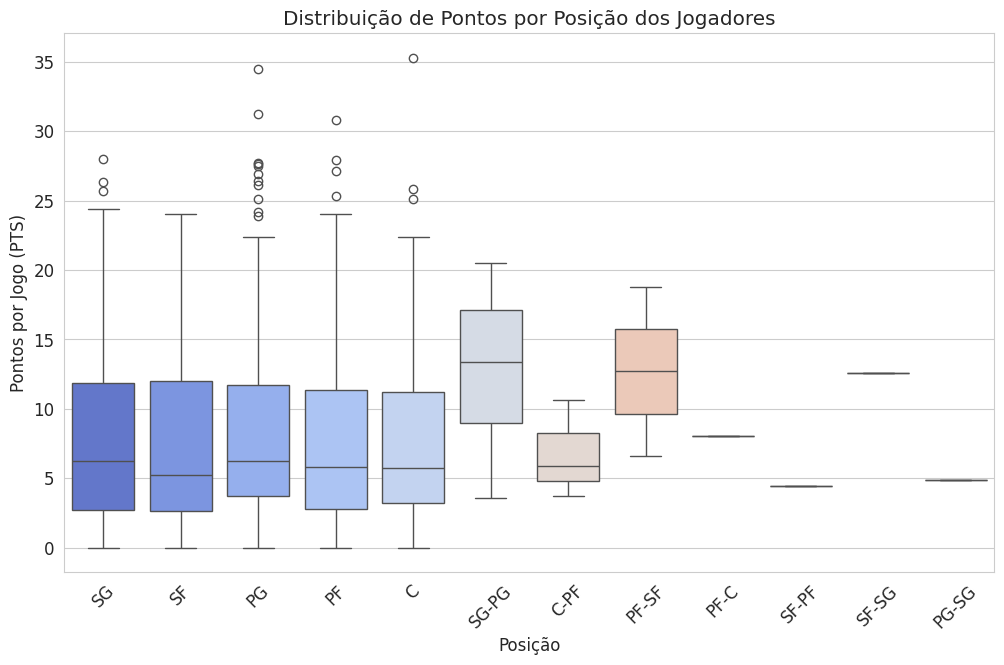

In [8]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Pos', y='PTS', order=df['Pos'].value_counts().index, palette='coolwarm')
plt.title('Distribuição de Pontos por Posição dos Jogadores')
plt.xlabel('Posição')
plt.ylabel('Pontos por Jogo (PTS)')
plt.xticks(rotation=45)
plt.show()

**Análise de Pontos por Posição:**
* As posições de guarda (`PG`, `SG`) e small forward (`SF`) tendem a ter as medianas de pontos mais altas, o que é esperado, já que são posições com maior responsabilidade ofensiva e de arremesso. Entretanto, cabe observar que, como o jogo é muito dinâmico, isto não é uma verdade absoluta. A mediana de pontos depende mais do estilo de jogo do time e do perfil do jogador do que apenas da posição. Por exemplo: Um time que jogue em função de um pivô (`C`), a mediana deste tende a ser mais alta que a de um armador (`SG` ou `PG`).
* Há presença de outliers nas posições isoladas, exceto em `SF`, representando os jogadores de elite que pontuam muito mais do que a média de sua posição. Isso é um bom indicativo da presença de superestrelas nos dados.
* As posições combinadas também mostram distribuições variadas, refletindo a versatilidade dos jogadores.

b) **Eficiência de Arremessos:**

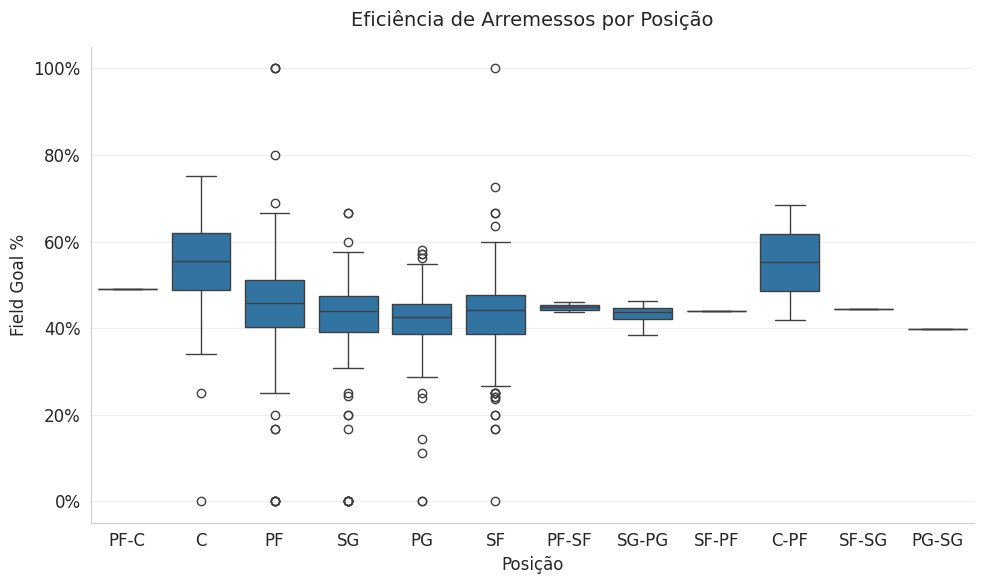

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Pos'], y=df['FG%'])
plt.title('Eficiência de Arremessos por Posição', fontsize=14, pad=15)
plt.xlabel('Posição', fontsize=12)
plt.ylabel('Field Goal %', fontsize=12)

# Formata o eixo Y para mostrar como porcentagem
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # 1.0 porque seus dados estão entre 0 e 1

# Melhorias adicionais de visualização
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()

plt.show()

**Análise da Eficiência nos Arremessos:**

O boxplot permite comparar a eficiência de arremessos entre diferentes posições. Isso pode indicar quais posições têm maior precisão nos arremessos.

Conclusões que podem ser tiradas:
*    Pivôs (`C`) tendem a ter uma maior eficiência nos arremessos, pois realizam mais finalizações próximas à cesta. O que é natural do estilo de jogo dessa posição.
*    Armadores (`PG`) possuem uma maior variação na eficiência, pois dependem de arremessos de média e longa distância.

c) **Relação entre Minutos por Jogo (MP) e Pontos (PTS):**

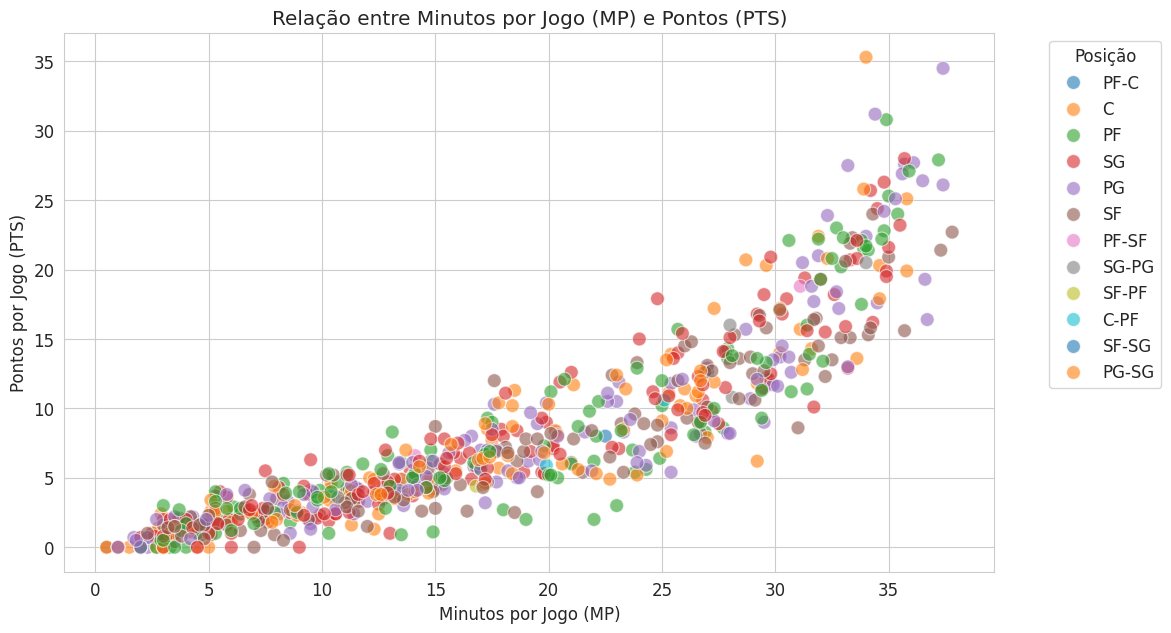

In [10]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='MP', y='PTS', alpha=0.6, hue='Pos', palette='tab10', s=100)
plt.title('Relação entre Minutos por Jogo (MP) e Pontos (PTS)')
plt.xlabel('Minutos por Jogo (MP)')
plt.ylabel('Pontos por Jogo (PTS)')
plt.legend(title='Posição', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Análise de MP vs. PTS:**
* Existe uma forte correlação positiva entre `MP` e `PTS`: jogadores que jogam mais minutos tendem a ter mais pontos. Isso é intuitivo, pois mais tempo em quadra significa mais oportunidades para pontuar.
* É possível notar aglomerados de pontos, com os jogadores de maior destaque em `MP` e `PTS` formando uma "cauda" superior direita.
* A coloração por posição não revela uma separação clara, mas é possível observar que jogadores de guarda (`PG`, `SG`) e small forwards (`SF`) estão mais ou menos bem distribuídos no topo da faixa de pontuação, o que corrobora a análise dos boxplots.
* Também é possível identificar a presença dos outliers, o que vai de encontro também ao que foi visto nos boxplots.


d) **Relação entre Assistências (AST) e Pontos (PTS):**

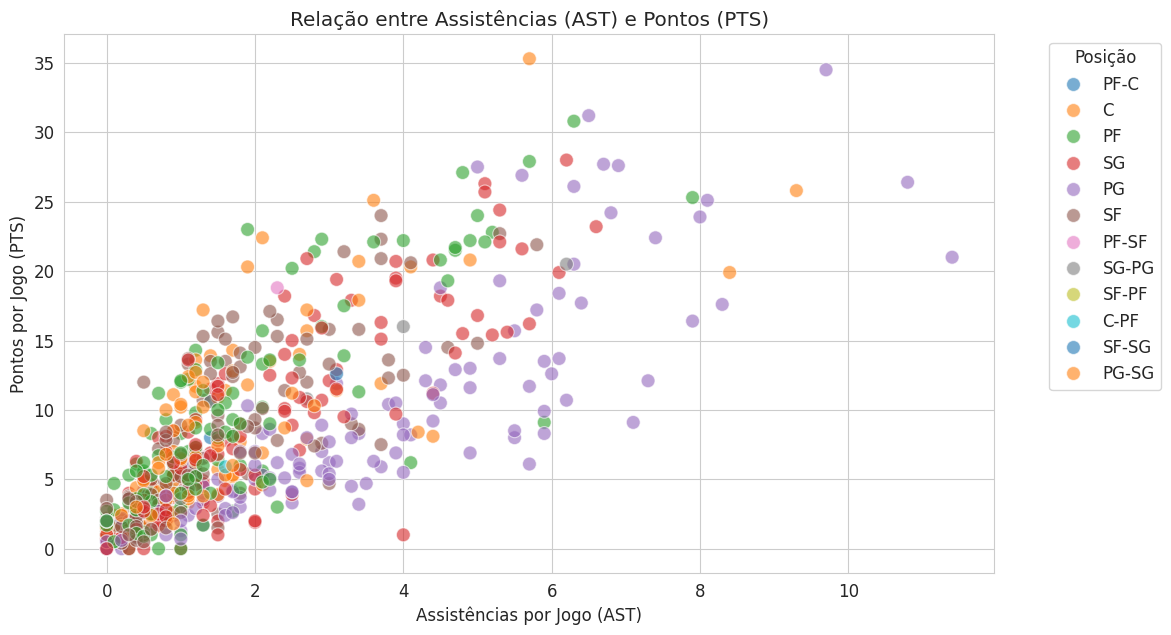

In [11]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='AST', y='PTS', alpha=0.6, hue='Pos', palette='tab10', s=100)
plt.title('Relação entre Assistências (AST) e Pontos (PTS)')
plt.xlabel('Assistências por Jogo (AST)')
plt.ylabel('Pontos por Jogo (PTS)')
plt.legend(title='Posição', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Análise de AST vs. PTS:**
* Há uma correlação positiva moderada entre `AST` e `PTS`, com mais dispersão em relação a `MP` e `PTS`. Jogadores que dão muitas assistências também tendem a pontuar bastante, mas não é uma regra tão forte quanto o tempo de jogo.
* Claramente, os jogadores de Point Guard (`PG`) se destacam no canto superior direito do gráfico, indicando que eles são frequentemente os líderes em assistências e também pontuam significativamente. Isso destaca o papel de criador de jogadas da posição `PG`.
* Alguns jogadores, principalmente `SG/SF`, podem ter alta pontuação mas poucas assistências, enquanto outros podem ter um equilíbrio maior.

4) Matriz de Correlação para Atributos Numéricos Selecionados:

A matriz de correlação é útil para verificarmos possíveis correlações entre as principais estatísticas do jogo.

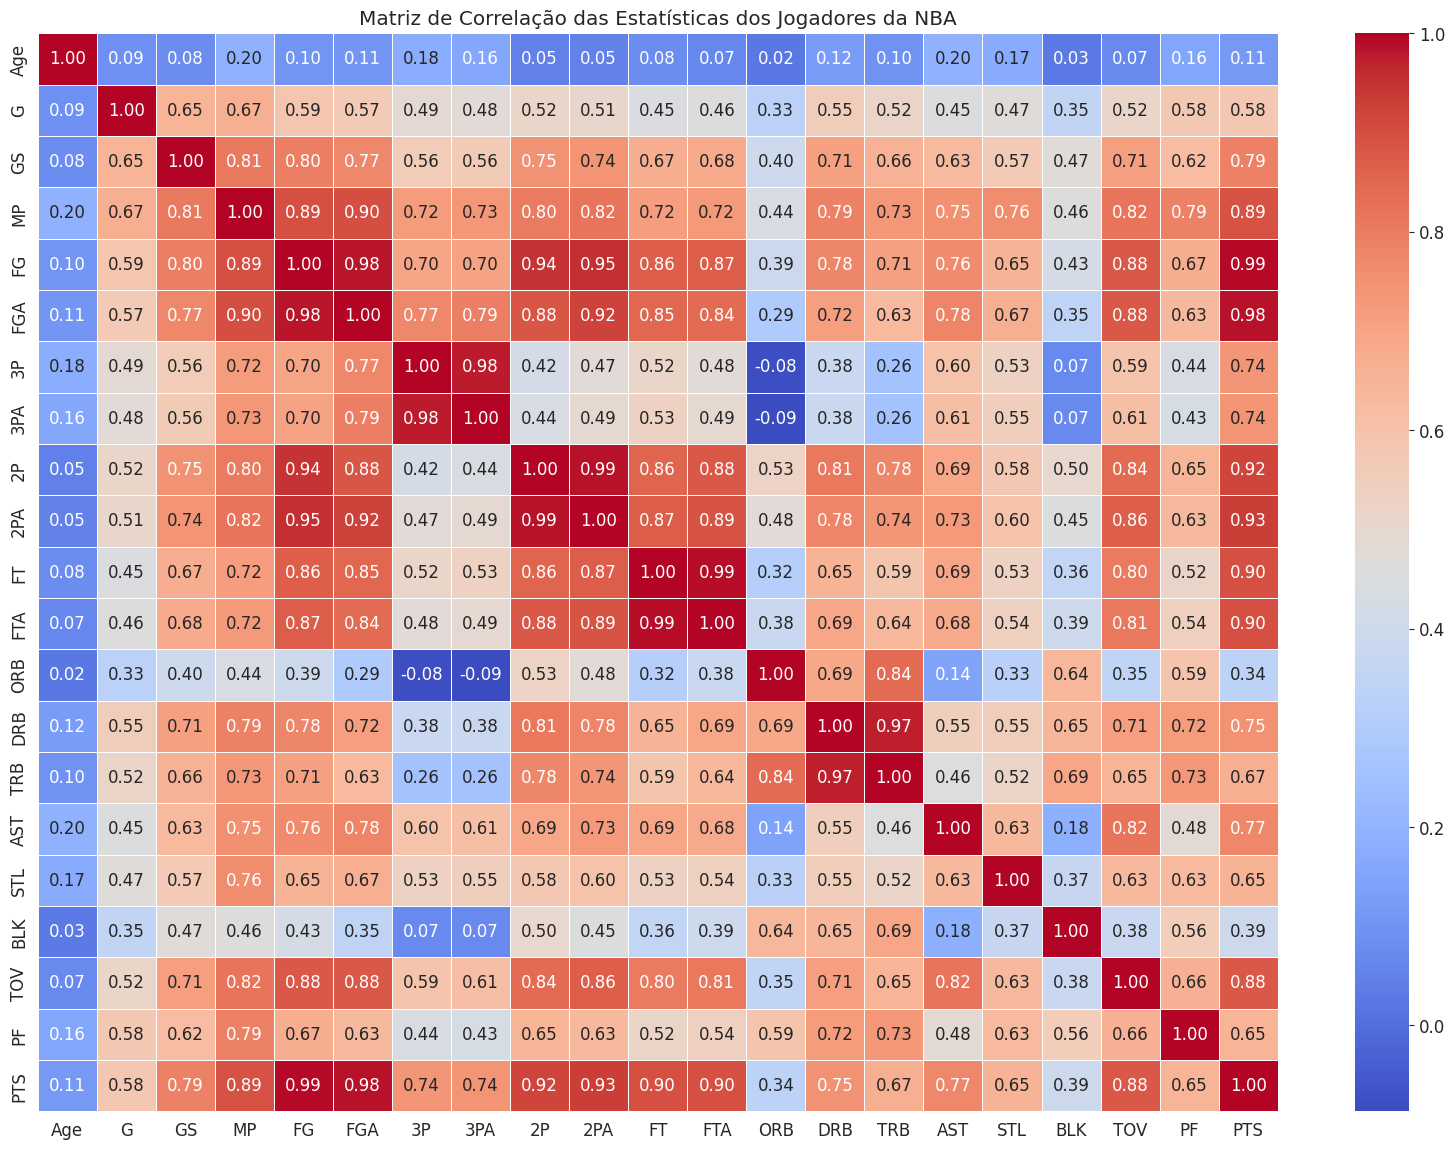

In [12]:
# Selecionar um subconjunto de colunas numéricas para a matriz de correlação
# Excluir 'Rk' e colunas que são derivadas de outras (ex: porcentagens)
correlation_cols = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA',
                    'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# Calcular a matriz de correlação
corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Estatísticas dos Jogadores da NBA')
plt.show()

**Análise da Matriz de Correlação:**

* **Altas Correlações Positivas:**
    * Como esperado, `MP` (Minutos por Jogo) tem alta correlação com a maioria das estatísticas ofensivas e defensivas (`PTS`, `AST`, `TRB`, `STL`, `FG`), indicando que mais tempo em quadra geralmente se traduz em mais volume estatístico.
    * `PTS` (Pontos) está fortemente correlacionado com `FGA` (Tentativas de Arremesso de Campo), `FG` (Arremessos de Campo Convertidos), `3PA` (Tentativas de 3 Pontos), `3P` (3 Pontos Convertidos), `FTA` (Tentativas de Lance Livre), `FT` (Lances Livres Convertidos). Isso é natural, pois pontos são o resultado dessas ações.
    * `TRB` (Total de Rebotes) tem alta correlação com `ORB` (Rebotes Ofensivos) e `DRB` (Rebotes Defensivos), pois é a soma de ambos.
    * `GS` (Jogos como Titular) também possui alta correlação com `MP`, o que é bem sensato aferir.

* **Correlações Moderadas:**
    * `STL` (Roubos) e `BLK` (Tocos) mostram correlações moderadas, em sua maioria, com outras estatísticas, mas não tão fortes quanto as ofensivas, refletindo papéis defensivos especializados.
    * `3P` (3 Pontos) e `AST` (Assistências) têm uma relação moderada entre si, o que pode inferir que a relação entre esses dois fatores pode ter influência no placar do jogo.

* **Correlações Baixas ou Negativas:**
    * `TOV` (Turnovers) tem correlações baixas com estatísticas ofensivas como `ORB` e defensivas como `BLK`, o que indica que os erros não são oriundos de rebotes ou bloqueios e sim por outros aspectos do jogo.
    * Não há correlações negativas fortes que chamem a atenção, o que sugere que as estatísticas de basquete tendem a se mover na mesma direção (mais jogos, mais minutos, mais ações, mais pontos, etc.).
    * `Age` (Idade) tem correlações geralmente baixas com a maioria das estatísticas, indicando que o desempenho não está linearmente correlacionado com a idade em todo o espectro. Há jogadores jovens e veteranos de alto desempenho.


A análise exploratória nos permitiu, portanto, entender a estrutura do dataset, identificar a presença de valores faltantes (especialmente nas porcentagens de arremesso) e observar as distribuições e correlações entre as variáveis. As distribuições assimétricas para muitas estatísticas de volume (pontos, assistências, rebotes) são um achado importante e podem influenciar as decisões de pré-processamento. A relação entre tempo de jogo e desempenho é clara e a distinção por posição começa a se revelar em algumas métricas. E, com isso, estamos prontos para a etapa seguinte.

### 5. Pré-processamento dos dados:

Finalizada a etapa de análise exploratória, podemos nos concentrar em realizar o pré-processamento dos dados, que consiste basicamente em realizar operações de limpeza, tratamento e preparação dos dados, a fim de torná-los adequados para modelagem futura. Isso inclui o tratamento de valores faltantes, a normalização/padronização e a codificação de variáveis categóricas.
Para o nosso projeto, focaremos nas operações descritas abaixo:
1.  **Tratamento de Valores Faltantes**: As colunas de porcentagem (`FG%`, `3P%`, `2P%`, `eFG%`, `FT%`) contêm NaN's. A abordagem mais sensata para porcentagens onde o denominador é zero (sem tentativas) é substituí-los por 0, indicando 0% de acerto em 0 tentativas.
2.  **Tratamento da coluna `Tm` (Time)**: A presença de `TOT` indica jogadores que jogaram por múltiplos times. Para este projeto, vamos garantir uma única entrada por jogador, priorizando as estatísticas `TOT` quando disponíveis.
3.  **Codificação de Variáveis Categóricas (`Pos`, `Tm`)**: O `One-Hot Encoding` é uma técnica apropriada para transformar variáveis categóricas em um formato numérico.
4.  **Divisão em Conjuntos de Treinamento e Teste**: Essencial para avaliar imparcialmente o desempenho do modelo.
5.  **Normalização/Padronização**: Importante para garantir que nenhuma característica domine o modelo e para otimizar o desempenho de alguns algoritmos, devendo ser aplicada *após* a divisão.

Estas etapas acima citadas são mostradas logo abaixo.

In [13]:
# Criar uma cópia do DataFrame original para o pré-processamento:
df_processed = df.copy()

print("\n--- Tratamento de Valores Faltantes ---")

# Colunas de porcentagem com NaN's:
percentage_cols = ['FG%', '3P%', '2P%', 'eFG%', 'FT%']

# Preencher NaN's com 0 para as colunas de porcentagem:
for col in percentage_cols:
    df_processed[col] = df_processed[col].fillna(0)
    print(f"Valores faltantes na coluna '{col}' preenchidos com 0.")

# Verificar se ainda há valores faltantes (exceto 'Rk' que não será usado como feature)
print("\nVerificação final de valores faltantes após preenchimento:")
print(df_processed.isnull().sum()[df_processed.isnull().sum() > 0])
# Se a coluna 'Rk' fosse removida no início, não apareceria aqui.
# Como é apenas um rank e não será usada como feature, podemos ignorar NaNs nela.
if 'Rk' in df_processed.columns:
    print(f"Colunas restantes com NaN's (se houver): {df_processed.isnull().sum()[df_processed.isnull().sum() > 0].index.tolist()}")
    print("A coluna 'Rk' é um índice e pode ser ignorada ou removida para modelagem.")


--- Tratamento de Valores Faltantes ---
Valores faltantes na coluna 'FG%' preenchidos com 0.
Valores faltantes na coluna '3P%' preenchidos com 0.
Valores faltantes na coluna '2P%' preenchidos com 0.
Valores faltantes na coluna 'eFG%' preenchidos com 0.
Valores faltantes na coluna 'FT%' preenchidos com 0.

Verificação final de valores faltantes após preenchimento:
Series([], dtype: int64)
Colunas restantes com NaN's (se houver): []
A coluna 'Rk' é um índice e pode ser ignorada ou removida para modelagem.


A substituição de `NaN` por `0` nas colunas de porcentagem é uma decisão importante. Em vez de remover as linhas (o que descartaria muitos jogadores, especialmente aqueles com poucas tentativas de 3 pontos ou lances livres), ou imputar com média/mediana (o que distorceria o significado de "0 tentativas"), preencher com `0` reflete a realidade de que o jogador não teve acertos (e nem tentativas) naquela categoria de arremesso.

In [14]:
# Tratamento da coluna 'TOT' em 'Tm':
print("\n--- Tratamento de Jogadores com Múltiplos Times ('TOT') ---")

# Identificar jogadores que aparecem mais de uma vez (incluindo 'TOT')
# Group by 'Player' e contar as ocorrências
player_counts = df_processed['Player'].value_counts()
multi_team_players = player_counts[player_counts > 1].index.tolist()

# DataFrame temporário para reconstruir
df_cleaned_players = pd.DataFrame()

for player in df_processed['Player'].unique():
    player_data = df_processed[df_processed['Player'] == player]
    if len(player_data) > 1: # Jogador com múltiplas entradas (trocou de time)
        # Manter apenas a linha onde 'Tm' é 'TOT' para este jogador
        # Se por algum motivo 'TOT' não existir, manter a primeira entrada.
        if 'TOT' in player_data['Tm'].values:
            df_cleaned_players = pd.concat([df_cleaned_players, player_data[player_data['Tm'] == 'TOT']])
            print(f"Mantendo a entrada 'TOT' para o jogador: {player}")
        else:
            # Caso raro onde múltiplas entradas mas nenhuma é 'TOT', manter a primeira.
            df_cleaned_players = pd.concat([df_cleaned_players, player_data.iloc[0:1]])
            print(f"Mantendo a primeira entrada para o jogador (sem 'TOT'): {player}")
    else: # Jogador com apenas uma entrada
        df_cleaned_players = pd.concat([df_cleaned_players, player_data])

df_processed = df_cleaned_players.reset_index(drop=True)

print(f"\nNúmero de jogadores únicos após tratamento de 'TOT': {df_processed['Player'].nunique()}")
print(f"Número de linhas no dataset após tratamento de 'TOT': {len(df_processed)}")
print("\nExemplo de jogador que trocou de time (verificar se 'TOT' foi mantido):")
print(df[df['Player'] == 'Pascal Siakam'])
print("Após processamento:")
print(df_processed[df_processed['Player'] == 'Pascal Siakam'])


--- Tratamento de Jogadores com Múltiplos Times ('TOT') ---
Mantendo a entrada 'TOT' para o jogador: Precious Achiuwa
Mantendo a entrada 'TOT' para o jogador: Ochai Agbaji
Mantendo a entrada 'TOT' para o jogador: OG Anunoby
Mantendo a entrada 'TOT' para o jogador: Marvin Bagley III
Mantendo a entrada 'TOT' para o jogador: Dalano Banton
Mantendo a entrada 'TOT' para o jogador: RJ Barrett
Mantendo a entrada 'TOT' para o jogador: Keita Bates-Diop
Mantendo a entrada 'TOT' para o jogador: Nicolas Batum
Mantendo a entrada 'TOT' para o jogador: Dāvis Bertāns
Mantendo a entrada 'TOT' para o jogador: Patrick Beverley
Mantendo a entrada 'TOT' para o jogador: Bismack Biyombo
Mantendo a entrada 'TOT' para o jogador: Bojan Bogdanović
Mantendo a entrada 'TOT' para o jogador: Marques Bolden
Mantendo a entrada 'TOT' para o jogador: Bruce Brown
Mantendo a entrada 'TOT' para o jogador: Troy Brown Jr.
Mantendo a entrada 'TOT' para o jogador: Alec Burks
Mantendo a entrada 'TOT' para o jogador: Robert Cov

Ao invés de simplesmente remover as linhas `TOT` ou as `não-TOT`, optamos por garantir que cada jogador tenha uma única representação no dataset, que é a soma de suas estatísticas totais na temporada (`Tm == 'TOT'`) se ele jogou por mais de um time. Isso assegura que estamos analisando o desempenho *total* de um jogador na temporada, evitando a duplicação de dados e garantindo que as estatísticas sejam as mais completas possíveis para um único jogador.

In [15]:
# Aplicação do One-Hot Encoding nas colunas 'Pos' e 'Tm':
print("\n--- One-Hot Encoding de Variáveis Categóricas ---")

# Remover a coluna 'Rk' (Rank) pois não é uma feature de desempenho e não será usada para modelagem.
df_processed = df_processed.drop('Rk', axis=1)
print("Coluna 'Rk' removida do dataset.")

# Aplicar One-Hot Encoding na coluna 'Pos'
df_processed = pd.get_dummies(df_processed, columns=['Pos'], prefix='Pos', dtype=int, drop_first=True) # O prefixo ajuda a identificar as colunas após o encoding
print("One-Hot Encoding aplicado à coluna 'Pos'.")

# Aplicar One-Hot Encoding na coluna 'Tm'
df_processed = pd.get_dummies(df_processed, columns=['Tm'], prefix='Tm', dtype=int, drop_first=True) # O prefixo também melhora a legibilidade do modelo
print("One-Hot Encoding aplicado à coluna 'Tm'.")

print("\nPrimeiras 5 linhas do dataset após One-Hot Encoding:")
print(df_processed.head())
print("\nDimensões do dataset após One-Hot Encoding:")

# Verificação das dimensões e colunas:
print(df_processed.shape)
print("\nColunas do dataset após One-Hot Encoding:")
print(df_processed.columns.tolist())


--- One-Hot Encoding de Variáveis Categóricas ---
Coluna 'Rk' removida do dataset.
One-Hot Encoding aplicado à coluna 'Pos'.
One-Hot Encoding aplicado à coluna 'Tm'.

Primeiras 5 linhas do dataset após One-Hot Encoding:
                     Player  Age   G  GS    MP   FG   FGA    FG%   3P  3PA  \
0          Precious Achiuwa   24  53  14  22.5  3.3   6.8  0.490  0.4  1.5   
1               Bam Adebayo   26  49  49  34.6  7.7  15.1  0.514  0.0  0.2   
2              Ochai Agbaji   23  59  10  18.9  2.1   4.8  0.427  0.9  2.7   
3              Santi Aldama   23  48  22  25.0  3.9   9.1  0.426  1.6  4.8   
4  Nickeil Alexander-Walker   25  60  16  23.1  2.6   6.1  0.422  1.4  3.9   

   ...  Tm_ORL  Tm_PHI  Tm_PHO  Tm_POR  Tm_SAC  Tm_SAS  Tm_TOR  Tm_TOT  \
0  ...       0       0       0       0       0       0       0       1   
1  ...       0       0       0       0       0       0       0       0   
2  ...       0       0       0       0       0       0       0       1   
3  ...       0

Algoritmos de Machine Learning geralmente requerem que todas as variáveis de entrada sejam numéricas. O One-Hot Encoding transforma cada categoria única em uma nova coluna binária (0 ou 1), o que permite que o modelo interprete essas variáveis categóricas sem assumir uma ordem ordinal que não existe. Isso é essencial para as colunas `Pos` (Posição do Jogador) e `Tm` (Time), que são nominais.

Numa futura análise para Machine Learning, portanto, esta etapa do One-Hot Encoding é crucial para que os dados sejam corretamente interpretados.

Antes de normalizarmos e padronizarmos os dados, é recomendável aplicar a etapa de treinamento/teste dos dados, de forma a se evitar o que chamamos de vazamento de dados (**data leakage**), ou seja, a contaminação das amostras que, porventura, possa prejudicar futuras avaliações na parte de Machine Learning.

A divisão dos dados em conjuntos de treinamento e teste é uma prática, portanto, fundamental e vai de encontro com as boas práticas de mercado. Ademais, preparamos o dataset para fases seguintes de modelagem, propiciando avaliações de qualquer modelo de Machine Learning de forma imparcial, ou seja, sem problema de vieses.

* **Conjunto de Treinamento (Training Set)**: É a porção dos dados utilizada para "ensinar" o modelo, ou seja, ajustar seus parâmetros internos. O modelo aprende padrões e relações a partir deste conjunto.
* **Conjunto de Teste (Test Set)**: É uma porção separada e independente dos dados, que o modelo nunca "viu" durante o treinamento. Ele é usado para avaliar a capacidade de generalização do modelo para dados novos e não vistos. Sem um conjunto de teste separado, um modelo pode "decorar" o conjunto de treinamento e apresentar um desempenho enganosamente bom em dados já conhecidos (o chamado overfitting), mas falhar miseravelmente em dados reais e ser, consequentemente, viesado.

A proporção comum para esta divisão varia, mas 70/30, 75/25 ou 80/20 são escolhas frequentes e comuns na prática cotidiana. Para este projeto, utilizaremos uma divisão de 80% para treinamento e 20% para teste.

In [16]:
print("\n--- Divisão em Conjuntos de Treinamento e Teste ---")

# O atributo 'Player' é um identificador e não deve ser usado como feature
# para treinamento de modelos, nem como variável alvo.
# Portanto, vamos separá-lo do dataset principal para as divisões.
players_names = df_processed['Player'] # Guardar os nomes dos jogadores
df_features_target = df_processed.drop('Player', axis=1) # DataFrame com features e possível target

# Para um problema supervisionado, precisamos definir X (features) e y (target/rótulo).
# Aqui, vamos usar 'PTS' como um exemplo de variável alvo, caso um modelo de regressão seja aplicado.
# Se o problema futuro fosse de classificação de posição, as variáveis alvo seriam as colunas 'Pos_'.

# Definir a variável alvo (y) e as features (X)
if 'PTS' in df_features_target.columns:
    X = df_features_target.drop('PTS', axis=1) # Features: todas as colunas exceto 'PTS'
    y = df_features_target['PTS']             # Target: 'PTS'
    print("Variável alvo (y) definida como 'PTS'.")
else:
    # Caso 'PTS' não seja o target, ou seja um problema não supervisionado
    # Mantenha X como todas as features e y como None.
    X = df_features_target
    y = None
    print("Nenhuma variável alvo explícita definida para esta fase de divisão.")

# Realizar a divisão dos dados em conjuntos de treinamento e teste
# test_size=0.20 significa 20% dos dados para o conjunto de teste
# random_state=42 garante que a divisão seja a mesma em execuções repetidas para reprodutibilidade
# shuffle=True (padrão) para embaralhar os dados antes da divisão
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"\nDimensões do conjunto de features original (X): {X.shape}")
print(f"Dimensões do conjunto de treino de features (X_train): {X_train.shape}")
print(f"Dimensões do conjunto de teste de features (X_test): {X_test.shape}")

if y is not None:
    print(f"Dimensões do conjunto de targets original (y): {y.shape}")
    print(f"Dimensões do conjunto de treino de targets (y_train): {y_train.shape}")
    print(f"Dimensões do conjunto de teste de targets (y_test): {y_test.shape}")
else:
    print("Nenhuma variável alvo (y) foi usada explicitamente para a divisão (problema não supervisionado ou preparatório).")


--- Divisão em Conjuntos de Treinamento e Teste ---
Variável alvo (y) definida como 'PTS'.

Dimensões do conjunto de features original (X): (548, 67)
Dimensões do conjunto de treino de features (X_train): (438, 67)
Dimensões do conjunto de teste de features (X_test): (110, 67)
Dimensões do conjunto de targets original (y): (548,)
Dimensões do conjunto de treino de targets (y_train): (438,)
Dimensões do conjunto de teste de targets (y_test): (110,)


Após a execução desta etapa, temos agora quatro conjuntos de dados:
* `X_train`: Features para treinamento do modelo.
* `X_test`: Features para avaliação do modelo.
* `y_train`: Variável alvo correspondente a `X_train`.
* `y_test`: Variável alvo correspondente a `X_test`.

Estes conjuntos estão prontos para serem utilizados na construção e avaliação de modelos de Machine Learning, garantindo que a performance do modelo seja avaliada em dados que ele nunca viu antes (dados de teste), fornecendo uma estimativa mais realista de seu desempenho em cenários do mundo real. Ou seja, numa futura utilização de modelos de Machine Learning, podemos avaliar com mais clareza a performance de execução e consistência dos dados apresentados.

In [17]:
# Normalização e padronização dos atributos numéricos:
print("\n--- Normalização e Padronização de Atributos Numéricos ---")

# Identificar colunas numéricas para escalonamento em X_train
# Excluir colunas One-Hot Encoding (já são binárias e não precisam de escalonamento)
numeric_features_for_scaling = X_train.select_dtypes(include=np.number).columns.tolist()
one_hot_cols_in_X = [col for col in X_train.columns if col.startswith('Pos_') or col.startswith('Tm_')]
numeric_features_for_scaling = [col for col in numeric_features_for_scaling if col not in one_hot_cols_in_X]

# --- Normalização (Min-Max Scaling) ---
print("\nAplicando Normalização (Min-Max Scaling)...")
scaler_minmax = MinMaxScaler()

# Ajustar o scaler APENAS no conjunto de treinamento e transformar ambos
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

X_train_normalized[numeric_features_for_scaling] = scaler_minmax.fit_transform(X_train[numeric_features_for_scaling])
X_test_normalized[numeric_features_for_scaling] = scaler_minmax.transform(X_test[numeric_features_for_scaling])

print("Conjunto de treinamento normalizado (Min-Max Scaling - Primeiras 5 linhas):")
print(X_train_normalized.head())
print("Valores mínimos nas colunas numéricas de X_train_normalized (devem ser 0):")
print(X_train_normalized[numeric_features_for_scaling].min().head())
print("Valores máximos nas colunas numéricas de X_train_normalized (devem ser 1):")
print(X_train_normalized[numeric_features_for_scaling].max().head())

print("\nConjunto de teste normalizado (Min-Max Scaling - Primeiras 5 linhas):")
print(X_test_normalized.head())
# Os min/max de X_test_normalized podem não ser exatamente 0/1, mas estarão no mesmo range.

# --- Padronização (Standard Scaling) ---
print("\nAplicando Padronização (Standard Scaling)...")
scaler_standard = StandardScaler()

# Ajustar o scaler APENAS no conjunto de treinamento e transformar ambos
X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()

X_train_standardized[numeric_features_for_scaling] = scaler_standard.fit_transform(X_train[numeric_features_for_scaling])
X_test_standardized[numeric_features_for_scaling] = scaler_standard.transform(X_test[numeric_features_for_scaling])

print("Conjunto de treinamento padronizado (Standard Scaling - Primeiras 5 linhas):")
print(X_train_standardized.head())
print("Média nas colunas numéricas de X_train_standardized (devem ser próximas de 0):")
print(X_train_standardized[numeric_features_for_scaling].mean().head())
print("Desvio padrão nas colunas numéricas de X_train_standardized (devem ser próximos de 1):")
print(X_train_standardized[numeric_features_for_scaling].std().head())

print("\nConjunto de teste padronizado (Standard Scaling - Primeiras 5 linhas):")
print(X_test_standardized.head())
# As médias e desvios padrão de X_test_standardized podem não ser exatamente 0/1, mas estarão no mesmo range.


--- Normalização e Padronização de Atributos Numéricos ---

Aplicando Normalização (Min-Max Scaling)...
Conjunto de treinamento normalizado (Min-Max Scaling - Primeiras 5 linhas):
      Age         G        GS        MP        FG       FGA    FG%    3P  \
46   0.25  0.350000  0.049180  0.241848  0.067797  0.076271  0.436  0.06   
93   0.60  0.816667  0.311475  0.796196  0.508475  0.618644  0.410  0.34   
464  0.35  0.416667  0.016393  0.252717  0.186441  0.177966  0.523  0.06   
321  0.30  0.583333  0.540984  0.728261  0.322034  0.411017  0.391  0.42   
272  0.45  0.950000  0.950820  0.839674  0.737288  0.800847  0.462  0.46   

          3PA    3P%  ...  Tm_ORL  Tm_PHI  Tm_PHO  Tm_POR  Tm_SAC  Tm_SAS  \
46   0.057377  0.467  ...       0       0       0       0       0       0   
93   0.459016  0.295  ...       0       0       0       0       0       0   
464  0.040984  0.500  ...       0       0       0       0       0       0   
321  0.475410  0.362  ...       0       1       0     

**Justificativa da Normalização/Padronização**: Muitos algoritmos de Machine Learning têm um desempenho superior quando os atributos numéricos são escalados para um intervalo ou distribuição comum.
* **Min-Max Scaling (Normalização)**: Escala os valores de cada característica para um intervalo fixo, geralmente entre 0 e 1. É útil quando se deseja preservar as relações entre os valores originais, mas trazê-los para uma escala comum. É sensível a outliers.
* **Standard Scaling (Padronização)**: Transforma os dados para ter uma média de 0 e um desvio padrão de 1. É menos afetado por outliers do que o Min-Max Scaling e é comumente usado para algoritmos que assumem que os dados seguem uma distribuição normal ou que são sensíveis à escala dos dados (por ex: K-Means, SVM, redes neurais).

**Ponto Crucial**: O `fit` dos scalers (`MinMaxScaler`, `StandardScaler`) deve ser realizado **somente nos dados de treinamento (`X_train`)**. Os parâmetros (médias, desvios padrão, mínimos, máximos) aprendidos do conjunto de treinamento serão então usados para transformar (com `transform`) tanto o conjunto de treinamento quanto o conjunto de teste. Isso evita o vazamento de informações do conjunto de teste para o treinamento.

**Análise das Transformações:**
Agora temos `X_train_normalized`, `X_test_normalized`, `X_train_standardized`, `X_test_standardized` prontos para a modelagem. Cada conjunto foi transformado usando parâmetros aprendidos exclusivamente do conjunto de treinamento, garantindo a sua integridade de avaliação.

Após o pré-processamento, as visualizações das distribuições das variáveis numéricas escaladas parecerão diferentes (escaladas para 0-1 ou média 0/std 1), mas a *forma* da distribuição (simetria, picos) não mudará, pois o escalonamento é uma transformação linear. No entanto, é útil verificar a correlação novamente ou boxplots com as variáveis numéricas transformadas.

Por exemplo, podemos visualizar a distribuição de `MP` após a padronização para confirmar a alteração da escala:

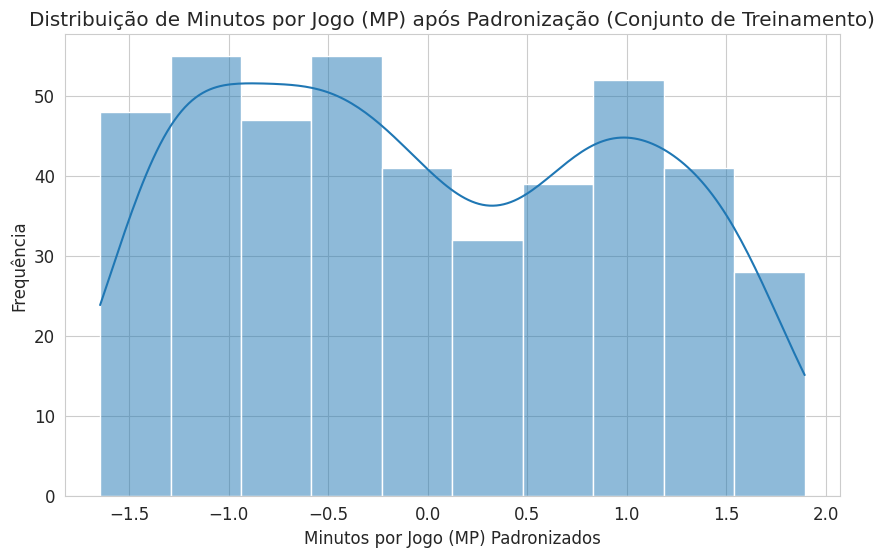

In [18]:
# Visualização da distribuição de MP após padronização:
plt.figure(figsize=(10, 6))
sns.histplot(X_train_standardized['MP'], kde=True) # Exemplo: Minutos por Jogo
plt.title('Distribuição de Minutos por Jogo (MP) após Padronização (Conjunto de Treinamento)')
plt.xlabel('Minutos por Jogo (MP) Padronizados')
plt.ylabel('Frequência')
plt.show()

Como esperado, a forma da distribuição para `MP` (e outras variáveis numéricas) permanece a mesma (ainda bimodal ou próxima a isso), mas a escala no eixo x mudou para valores em torno de 0, com desvio padrão de 1. Isso confirma que a transformação foi aplicada corretamente, tornando os dados mais adequados para algoritmos que requerem features escaladas.

E, para corroborar, que a padronização está funcionando, podemos escolher outro atributo (por ex: `PTS`) e realizar o mesmo procedimento.


--- Visualização de Pontos por Jogo (PTS) após Padronização ---


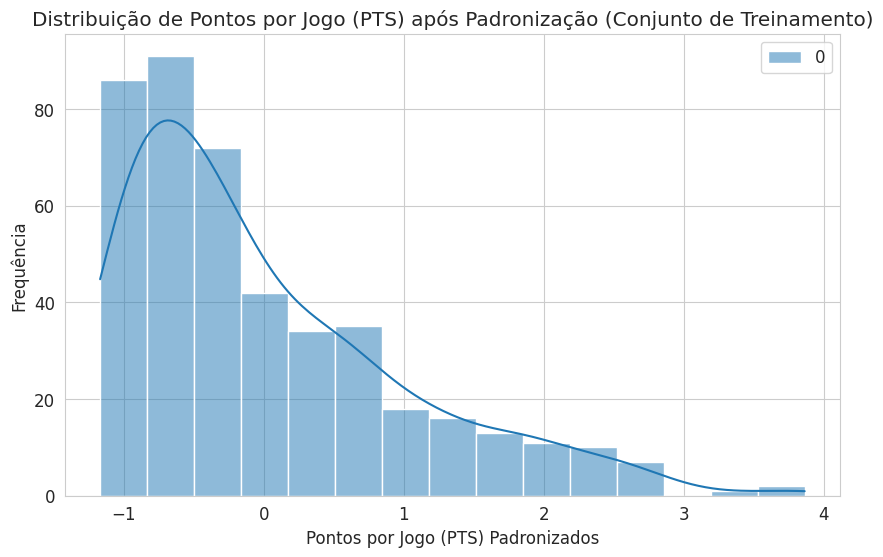

Média de y_train_standardized (deve ser próxima de 0): 1.039249863233594e-16
Desvio padrão de y_train_standardized (deve ser próximo de 1): 0.9999999999999999


In [19]:
# Visualização da distribuição de PTS após padronização:
print("\n--- Visualização de Pontos por Jogo (PTS) após Padronização ---")

if y is not None:
    # Criar um scaler para a variável alvo (y)
    #
    scaler_y = StandardScaler()

    # Ajustar o scaler APENAS no conjunto de treinamento de 'y' e transformar ambos
    y_train_standardized = scaler_y.fit_transform(y_train.values.reshape(-1, 1)) # reshape para que seja 2D
    y_test_standardized = scaler_y.transform(y_test.values.reshape(-1, 1)) # reshape para que seja 2D

    # Plotar o histograma de y_train_standardized
    plt.figure(figsize=(10, 6))
    sns.histplot(y_train_standardized, kde=True)
    plt.title('Distribuição de Pontos por Jogo (PTS) após Padronização (Conjunto de Treinamento)')
    plt.xlabel('Pontos por Jogo (PTS) Padronizados')
    plt.ylabel('Frequência')
    plt.show()

    print("Média de y_train_standardized (deve ser próxima de 0):", np.mean(y_train_standardized))
    print("Desvio padrão de y_train_standardized (deve ser próximo de 1):", np.std(y_train_standardized))

else:
    print("A variável alvo (y) não foi definida, então a padronização de 'PTS' não é aplicável neste contexto.")

Similar ao gráfico `MP` visto acima, a distribuição de `PTS` após a padronização mantém sua forma original (assimétrica à direita, com uma cauda longa para valores altos), mas agora seus valores estão centrados em torno de 0, com um desvio padrão de 1. Isso confirma que a variável alvo foi corretamente escalada para um formato mais amigável a modelos de Machine Learning caso a padronização do alvo seja necessária para o algoritmo escolhido.

E, desta forma, comprovamos que a padronização está sendo executada a contento, estando o trabalho pronto para demais análises que se desejem como, por exemplo, verificar a eficiência do projeto através de algoritmos de Machine Learning.

### 6. Conclusão Final:

Este notebook forneceu uma análise exploratória completa e um pré-processamento rigoroso dos dados de estatísticas de jogadores da NBA 2022-2023, seguindo um checklist detalhado. Realizamos a definição do problema, exploramos as características do dataset, tratamos valores faltantes, lidamos com dados categóricos através de One-Hot Encoding e, crucialmente, dividimos o dataset em conjuntos de treinamento e teste antes de aplicar as transformações de normalização e padronização. Este passo garante que o treinamento de futuros modelos de Machine Learning seja realizado de forma imparcial, prevenindo o vazamento de dados e permitindo, também, uma avaliação mais realista do desempenho.

Com isso, o dataset resultante está agora limpo, consistente e formatado adequadamente, com conjuntos de dados distintos (`X_train`, `X_test`, `y_train`, `y_test`) e prontos para a fase de modelagem em Machine Learning. As visualizações e análises iniciais já revelaram padrões interessantes sobre o desempenho e os papéis (funções) dos jogadores, abrindo portas para a aplicação de modelos **supervisionados** (algoritmos de classificação como, por ex: prever a posição com base nas estatísticas ou de regressão como, por ex: prever pontos com base em outras métricas) ou de modelos **não-supervisionados** (por ex: a utilização de algoritmos de agrupamento para identificar perfis de jogadores).

Este projeto estabelece, pois, uma base sólida para investigações mais aprofundadas bem como a construção de modelos preditivos.

Adicionalmente, o trabalho foi bastante interessante para solidificar e aprimorar os conhecimentos passados na disciplina, além de acrescentar estas ideias ao portfólio profissional.